## Wstępna analiza zdjęć
### Dataset FG-NET

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2

In [2]:
path = "./FGNET/FGNET/images"
filenames = os.listdir(path)
print(filenames)
print(f"Image amount: {len(filenames)}")

individuals = [el[:3] for el in filenames]
print(len(set(individuals)))

['008A16.JPG', '070A03.JPG', '015A19.JPG', '035A05.JPG', '072A25.JPG', '026A07.JPG', '079A00.JPG', '017A36.JPG', '076A05.JPG', '052A18.JPG', '018A33.JPG', '082A00.JPG', '054A19.JPG', '073A00.JPG', '043A03.JPG', '002A38.JPG', '012A18.JPG', '058A00.JPG', '081A05.JPG', '074A07.JPG', '009A03.JPG', '036A08.JPG', '039A13.JPG', '031A07.JPG', '030A05.JPG', '073A15.JPG', '027A13.JPG', '035A18.JPG', '058A13.JPG', '016A10.JPG', '049A06.JPG', '043A10.JPG', '030A17.JPG', '006A36.JPG', '020A13.JPG', '037A06.JPG', '014A16.JPG', '064A19.JPG', '040A21.JPG', '025A03.JPG', '025A23.JPG', '031A19.JPG', '026A04.JPG', '079A06.JPG', '039A50.JPG', '029A16.JPG', '074A09.JPG', '015A00.JPG', '036A13.JPG', '022A18.JPG', '057A16.JPG', '014A12.JPG', '023A18.JPG', '002A05.JPG', '022A27.JPG', '052A10.JPG', '025A12.JPG', '040A05.JPG', '042A14.JPG', '038A08.JPG', '041A24.JPG', '024A23.JPG', '077A07.JPG', '062A18.JPG', '038A11.JPG', '060A08.JPG', '055A23.JPG', '064A10.JPG', '068A09.JPG', '028A20.JPG', '020A04.JPG', '068A

Max age: 69, Min age: 0
Amount of images of age greater than 30: 148


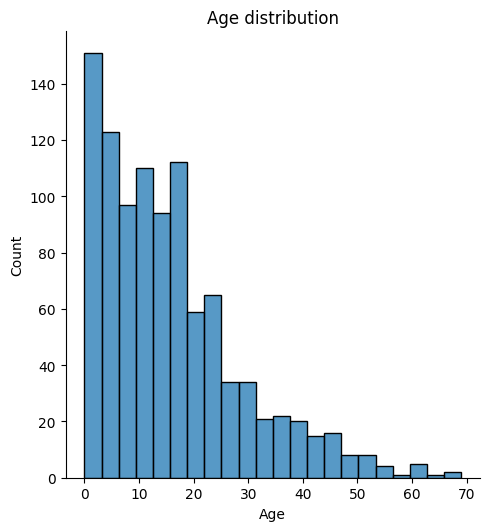

In [3]:
%matplotlib inline
ages = [int(el[4:6]) for el in filenames]
print(f"Max age: {max(ages)}, Min age: {min(ages)}")
top_age = 30
greater_ages = [a for a in ages if a >= top_age]
print(f"Amount of images of age greater than {top_age}: {len(greater_ages)}")
ages_np = np.array(ages)
sns.displot(data=ages_np)
plt.xlabel('Age')
plt.title("Age distribution")
plt.show()

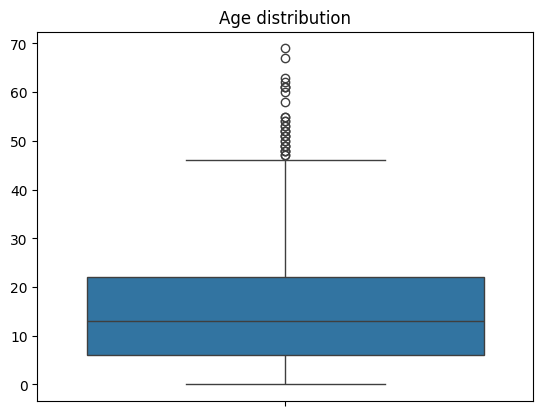

In [4]:
sns.boxplot(data=ages_np)
plt.title("Age distribution")
plt.show()

In [5]:
from collections import Counter

counter = Counter(individuals)
max_images = max(counter, key=counter.get)
min_images = min(counter, key=counter.get)
print(f"Max amount of images - {max_images}: {counter[max_images]}, min amount of images - {min_images}: {counter[min_images]}")

Max amount of images - 076: 18, min amount of images - 064: 6


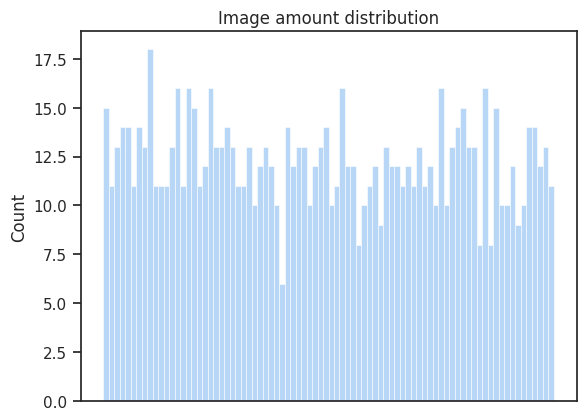

In [64]:
h1 = sns.histplot(data=individuals)
plt.title('Image amount distribution')
h1.set(xticklabels=[])
h1.tick_params(bottom=False)
plt.show()

In [7]:
amounts = list(map(int, counter.values()))
print(f"Median: {np.median(amounts)}")
print(f"Mean: {np.mean(amounts)}")

Median: 12.0
Mean: 12.21951219512195


Znajdują się zarówno szare jak i kolorowe zdjęcia, niektóre zdjęcia są rozmazane.

In [ ]:
# Load images
images = [cv2.imread(os.path.join(path, filename)) for filename in os.listdir(path)]

In [23]:
def check_greyscale():
    for image in images:
        b, g, r = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        if len(image.shape) < 3:
            yield True
        elif image.shape[2] == 1:
            yield True
        elif (b == g).all() and (b==r).all():
            yield True
        else:
            yield False

results = Counter(check_greyscale())
print(f"Greyscale images: {results[True]}, Color images: {results[False]}")


Greyscale images: 187, Color images: 815


Obrazy mają różne kształty

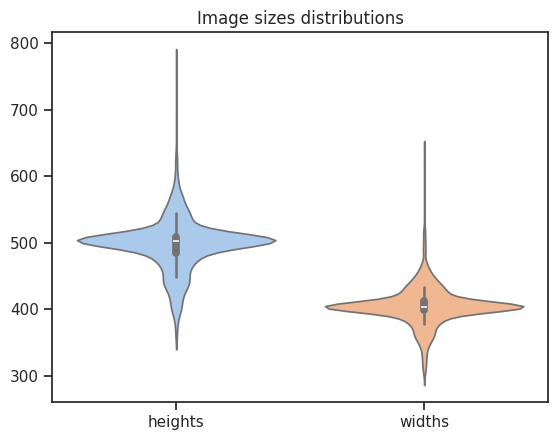

In [52]:
image_widths, image_heights = [], []
for img in images:
    image_widths.append(img.shape[1]), image_heights.append(img.shape[0])

hw_df = pd.DataFrame({'heights': image_heights, 'widths': image_widths})

sns.set_theme(style="ticks", palette="pastel")
plt.title("Image sizes distributions")
sns.violinplot(data=hw_df)
plt.show()



Większość obrazów ma szerokości ok. 400px i wysokości ok. 500px, ale istnieją wartości odstające.